#**Frac treating pressure prediction using LSTM**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Frac_Stage_Data.xlsx to Frac_Stage_Data.xlsx


In [3]:
data= pd.read_excel('Frac_Stage_Data.xlsx')

In [4]:
data.describe()

,Time,SLUR RATE,PROP CON,TR PRESS
count,4600.000000,4600.000000,4600.000000,4600.000000
mean,2300.500000,97.079174,1.233283,9032.118696
std,1328.049949,7.149957,0.693707,127.579547
min,1.000000,48.700000,0.000000,8058.000000
25%,1150.750000,96.800000,0.700000,8940.000000
50%,2300.500000,99.600000,1.000000,9055.000000
75%,3450.250000,99.800000,1.800000,9141.000000
max,4600.000000,100.300000,2.500000,9268.000000


In [5]:
data.head()

,Time,SLUR RATE,PROP CON,TR PRESS
0,1,49.4,0.0,8560
1,2,50.1,0.0,8537
2,3,50.1,0.0,8534
3,4,49.3,0.0,8617
4,5,49.2,0.0,8646


In [6]:
data.tail()

,Time,SLUR RATE,PROP CON,TR PRESS
4595,4596,99.1,1.0,9194
4596,4597,99.0,1.0,9201
4597,4598,99.0,1.0,9184
4598,4599,99.3,1.0,9178
4599,4600,99.0,1.0,9188


Text(0, 0.5, 'Slurry Rate (bpm))')

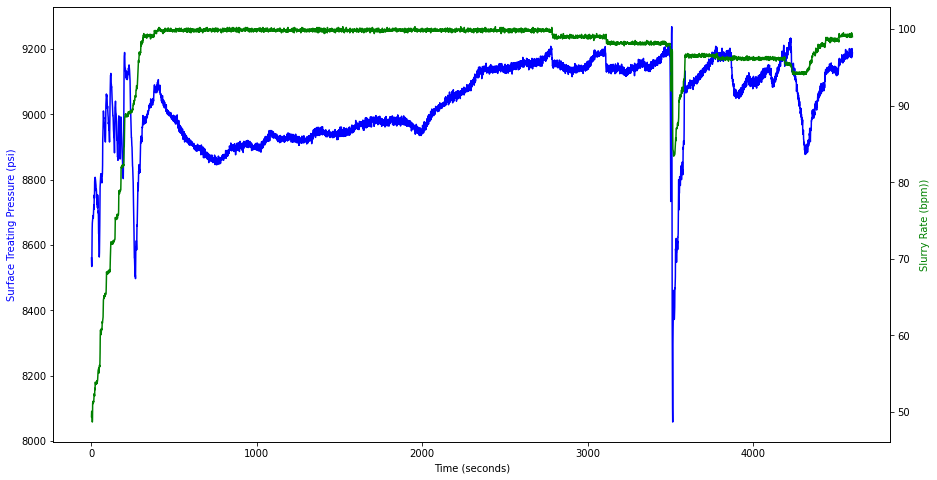

<Figure size 1080x576 with 0 Axes>

In [7]:
fig, ax1 = plt.subplots(figsize=(15,8))
plt.figure(figsize=(15,8))
ax2 = ax1.twinx()

ax1.plot(data['Time'], data['TR PRESS'], 'b')
ax2.plot(data['Time'], data['SLUR RATE'], 'g')


ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Surface Treating Pressure (psi)', color='b')
ax2.set_ylabel('Slurry Rate (bpm))', color='g')

In [8]:
start_time = 1
end_time = 4500

In [9]:
filter = (data['Time'] > start_time) & (data['Time'] <= end_time)

In [10]:
data_training = data.loc[filter].copy()
data_training.tail()

,Time,SLUR RATE,PROP CON,TR PRESS
4495,4496,98.7,1.0,9127
4496,4497,98.8,1.0,9125
4497,4498,98.5,1.0,9131
4498,4499,98.4,1.0,9136
4499,4500,98.6,1.0,9145


In [11]:
start_time2 = 4500
end_time2 = 4600

In [12]:
filter2 = (data['Time'] > start_time2) & (data['Time'] <= end_time2)

In [13]:
data_testing = data.loc[filter2].copy()
data_testing.tail()

,Time,SLUR RATE,PROP CON,TR PRESS
4595,4596,99.1,1.0,9194
4596,4597,99.0,1.0,9201
4597,4598,99.0,1.0,9184
4598,4599,99.3,1.0,9178
4599,4600,99.0,1.0,9188


In [14]:
data_testing.head()

,Time,SLUR RATE,PROP CON,TR PRESS
4500,4501,98.4,1.0,9120
4501,4502,98.6,1.0,9133
4502,4503,98.7,1.0,9131
4503,4504,98.6,1.0,9125
4504,4505,98.6,1.0,9118


In [15]:
training_data= data_training.drop(['Time'], axis=1)
training_data.head()

,SLUR RATE,PROP CON,TR PRESS
1,50.1,0.0,8537
2,50.1,0.0,8534
3,49.3,0.0,8617
4,49.2,0.0,8646
5,48.7,0.0,8667


In [16]:
scaler=MinMaxScaler()
training_data= scaler.fit_transform(training_data)
training_data

array([[0.02713178, 0.        , 0.39586777],
       [0.02713178, 0.        , 0.39338843],
       [0.01162791, 0.        , 0.46198347],
       ...,
       [0.96511628, 0.4       , 0.88677686],
       [0.96317829, 0.4       , 0.89090909],
       [0.96705426, 0.4       , 0.89834711]])

In [17]:
X_train= []
y_train= []

In [18]:
for i in range(60,training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    y_train.append(training_data[i,0])

In [19]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [20]:
X_train.shape, y_train.shape

((4439, 60, 3), (4439,))

## **Building LSTM**

In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM, Dropout

In [22]:
import tensorflow as tf
import random as python_random

def reset_seeds():
    np.random.seed(100) 
    python_random.seed(100)
    tf.random.set_seed(100)

reset_seeds() 

Frac_LSTM = Sequential()

Frac_LSTM.add(LSTM(units=200, activation='relu', return_sequences=True, input_shape=(X_train.shape[1],3)))
Frac_LSTM.add(Dropout(0.3))

Frac_LSTM.add(LSTM(units=200, activation='relu', return_sequences=True))
Frac_LSTM.add(Dropout(0.3))


Frac_LSTM.add(LSTM(units=200, activation='relu'))
Frac_LSTM.add(Dropout(0.3))

Frac_LSTM.add(Dense(units=1))

In [23]:
Frac_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 200)           163200    
                                                                 
 dropout (Dropout)           (None, 60, 200)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 200)           320800    
                                                                 
 dropout_1 (Dropout)         (None, 60, 200)           0         
                                                                 
 lstm_2 (LSTM)               (None, 200)               320800    
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 2

In [24]:
Frac_LSTM.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
history=Frac_LSTM.fit(X_train,y_train, epochs=100, batch_size=32, shuffle=True)

Epoch 1/100
139/139 [==============================] - 76s 518ms/step - loss: 0.0940
Epoch 2/100
139/139 [==============================] - 71s 512ms/step - loss: 0.0074
Epoch 3/100
139/139 [==============================] - 71s 514ms/step - loss: 0.0068
Epoch 4/100
139/139 [==============================] - 72s 516ms/step - loss: 0.0061
Epoch 5/100
139/139 [==============================] - 72s 516ms/step - loss: 0.0054
Epoch 6/100
139/139 [==============================] - 71s 509ms/step - loss: 0.0051
Epoch 7/100
139/139 [==============================] - 71s 507ms/step - loss: 0.0052
Epoch 8/100
139/139 [==============================] - 71s 510ms/step - loss: 0.0049
Epoch 9/100
139/139 [==============================] - 71s 511ms/step - loss: 0.0048
Epoch 10/100
139/139 [==============================] - 71s 509ms/step - loss: 0.0043
Epoch 11/100
139/139 [==============================] - 71s 508ms/step - loss: 0.0044
Epoch 12/100
139/139 [==============================] - 71s 513

## **Preparing Test Data Set**

In [26]:
data_testing.head()

,Time,SLUR RATE,PROP CON,TR PRESS
4500,4501,98.4,1.0,9120
4501,4502,98.6,1.0,9133
4502,4503,98.7,1.0,9131
4503,4504,98.6,1.0,9125
4504,4505,98.6,1.0,9118


In [27]:
data_training.head()

,Time,SLUR RATE,PROP CON,TR PRESS
1,2,50.1,0.0,8537
2,3,50.1,0.0,8534
3,4,49.3,0.0,8617
4,5,49.2,0.0,8646
5,6,48.7,0.0,8667


In [28]:
past_60_secs= data_training.tail(60)

In [29]:
df=past_60_secs.append(data_testing,ignore_index=True)
df.head()

,Time,SLUR RATE,PROP CON,TR PRESS
0,4441,98.6,1.0,9132
1,4442,98.7,1.0,9122
2,4443,98.6,1.0,9124
3,4444,98.8,1.0,9125
4,4445,98.8,1.0,9127


In [30]:
df=df.drop(['Time'], axis=1)
df.head()

,SLUR RATE,PROP CON,TR PRESS
0,98.6,1.0,9132
1,98.7,1.0,9122
2,98.6,1.0,9124
3,98.8,1.0,9125
4,98.8,1.0,9127


In [31]:
df.describe()

,SLUR RATE,PROP CON,TR PRESS
count,160.000000,160.0,160.000000
mean,98.878125,1.0,9156.781250
std,0.307899,0.0,22.452934
min,98.200000,1.0,9118.000000
25%,98.600000,1.0,9137.000000
50%,98.900000,1.0,9158.500000
75%,99.100000,1.0,9176.000000
max,99.500000,1.0,9201.000000


In [32]:
testing_inputs= scaler.transform(df)

In [33]:
testing_inputs

array([[0.96705426, 0.4       , 0.88760331],
       [0.96899225, 0.4       , 0.87933884],
       [0.96705426, 0.4       , 0.88099174],
       [0.97093023, 0.4       , 0.88181818],
       [0.97093023, 0.4       , 0.88347107],
       [0.97093023, 0.4       , 0.88347107],
       [0.96705426, 0.4       , 0.89669421],
       [0.97286822, 0.4       , 0.89173554],
       [0.96705426, 0.4       , 0.89173554],
       [0.96705426, 0.4       , 0.88512397],
       [0.96899225, 0.4       , 0.88347107],
       [0.96511628, 0.4       , 0.89173554],
       [0.96511628, 0.4       , 0.88677686],
       [0.96705426, 0.4       , 0.89752066],
       [0.97093023, 0.4       , 0.89338843],
       [0.96511628, 0.4       , 0.89173554],
       [0.96317829, 0.4       , 0.89752066],
       [0.96511628, 0.4       , 0.88677686],
       [0.96705426, 0.4       , 0.8892562 ],
       [0.96899225, 0.4       , 0.89256198],
       [0.96899225, 0.4       , 0.90247934],
       [0.96317829, 0.4       , 0.90578512],
       [0.

In [34]:
X_test=[]
y_test=[]

In [35]:
testing_inputs.shape[0]

160

In [36]:
for i in range(60,testing_inputs.shape[0]):
    X_test.append(testing_inputs[i-60:i])
    y_test.append(testing_inputs[i,0])

In [37]:
X_test, y_test= np.array(X_test), np.array(y_test)

X_test.shape, y_test.shape

# (samples, timestep, features)

((100, 60, 3), (100,))

In [38]:
y_pred=Frac_LSTM.predict(X_test)
y_pred=pd.DataFrame(y_pred,columns=['Predicted TR PRESS'])
y_pred.head()

,Predicted TR PRESS
0,0.962552
1,0.962532
2,0.962506
3,0.962479
4,0.962444


In [39]:
y_pred.describe()

,Predicted TR PRESS
count,100.000000
mean,0.964552
std,0.001251
min,0.962299
25%,0.963774
50%,0.965090
75%,0.965544
max,0.965837


In [40]:
y_pred['Predicted TR PRESS']=y_pred['Predicted TR PRESS']*(data['TR PRESS'].max()-data['TR PRESS'].min())+(data['TR PRESS'].min())

In [41]:
y_test=pd.DataFrame(y_test,columns=['Actual TR PRESS'])
y_test['Actual TR PRESS']=y_test['Actual TR PRESS']*(data['TR PRESS'].max()-data['TR PRESS'].min())+(data['TR PRESS'].min())
y_test.head()

,Actual TR PRESS
0,9223.445736
1,9228.135659
2,9230.480620
3,9228.135659
4,9228.135659


In [42]:
y_pred['Predicted TR PRESS'].head()

0    9222.687500
1    9222.663086
2    9222.631836
3    9222.599609
4    9222.556641
Name: Predicted TR PRESS, dtype: float32

In [43]:
# scaler.scale_

## **Visualization**

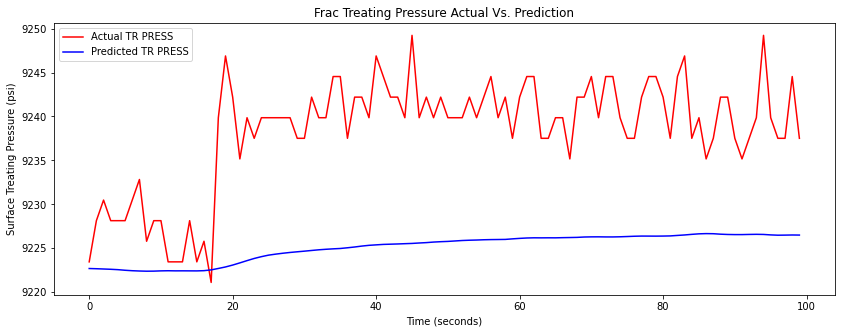

In [44]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color='red', label='Actual TR PRESS')
plt.plot(y_pred['Predicted TR PRESS'], color='blue', label='Predicted TR PRESS')
plt.title('Frac Treating Pressure Actual Vs. Prediction')
plt.xlabel('Time (seconds)')
plt.ylabel('Surface Treating Pressure (psi)')
plt.legend()